# Credit Risk Modelling

**Description:**
In this competition, you must explore and cleanse a dataset consisting of over 111,000 loan records to determine the best way to predict whether a loan applicant will fully repay or default on a loan. You must then build a machine learning model that returns the unique loan ID and a loan status label that indicates whether the loan will be fully paid or charged off.

### Getting all the Dependencies

In [3]:
# Installing dependencies
!pip install --upgrade pip
!pip install numpy --upgrade --user
!pip install pandas --upgrade --user
!pip install scikit-learn --upgrade --user

Requirement already up-to-date: pip in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (19.3.1)
Requirement already up-to-date: numpy in /home/nbuser/.local/lib/python3.6/site-packages (1.17.3)
Requirement already up-to-date: pandas in /home/nbuser/.local/lib/python3.6/site-packages (0.25.3)
Requirement already up-to-date: scikit-learn in /home/nbuser/.local/lib/python3.6/site-packages (0.21.3)


In [4]:
# Avoiding Warnings
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
# Importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

### Loading the Data

In [6]:
# Importing Dataset
train = pd.read_csv("https://dim-mlpython.s3.amazonaws.com/CreditRiskModeling/train.csv", low_memory=False)
test = pd.read_csv("https://dim-mlpython.s3.amazonaws.com/CreditRiskModeling/test.csv", low_memory=False)

### Describing the data

In [7]:
# For each column heading we replace " " and convert the heading in lowercase 
cleancolumn = []
for i in range(len(train.columns)):
    cleancolumn.append(train.columns[i].replace(' ', '_').lower())
train.columns = cleancolumn

In [8]:
train.head()

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,a3fdf1db-e991-4293-976c-7d35564c0aec,74561f96-304a-492d-bc19-a6107d2afee9,Charged Off,10120,Long Term,6920.000,10+ years,Rent,47564.000,Debt Consolidation,990.92,21.800,28.000,10,0,3840,7694,0.000,0.000
1,c3f8006d-d1ef-4a94-ba55-c48034974205,b8e70101-dd49-4a39-84a6-5f92b390684c,Fully Paid,7144,Short Term,721.000,2 years,Home Mortgage,40820.000,Debt Consolidation,574.88,10.700,nan,6,0,13269,22565,0.000,0.000
2,076b722f-3658-47a8-a7f1-5179a9b45ade,0a28e046-9239-4ee0-8770-68a2f72bf2a0,Fully Paid,10100,Short Term,726.000,7 years,Own Home,54540.000,Debt Consolidation,577.22,37.300,nan,6,0,5373,8667,0.000,0.000
3,c2d68e37-572b-4a3b-afaa-b55a679c7d67,dc755ef2-1773-4d3b-8b6b-668bbae290c5,Fully Paid,30362,Long Term,708.000,1 year,Home Mortgage,63450.000,Debt Consolidation,1110.37,12.500,52.000,14,0,38329,57207,0.000,0.000
4,c02558d1-58cb-4b36-9569-ae55baeb328a,f0804ea2-249b-4e6c-ab2a-1554a7ff6a5b,Fully Paid,3571,Short Term,700.000,5 years,Home Mortgage,41370.000,Debt Consolidation,875.67,13.100,6.000,4,0,384,985,0.000,0.000


In [9]:
print(train.shape)
train.describe()

(77823, 19)


,current_loan_amount,credit_score,annual_income,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,bankruptcies,tax_liens
count,77823.000,62908.000,62908.000,77823.000,36414.000,77823.000,77823.000,77823.000,77675.000,77818.000
mean,11537410.504,1070.662,72473.466,18.202,34.854,11.117,0.169,15529.053,0.119,0.029
std,31927864.472,1464.730,58417.419,7.030,21.889,5.013,0.483,20322.248,0.353,0.254
min,885.000,585.000,4268.000,3.600,0.000,0.000,0.000,0.000,0.000,0.000
25%,8149.500,705.000,44679.750,13.500,16.000,8.000,0.000,5879.000,0.000,0.000
50%,14213.000,724.000,61770.000,16.900,32.000,10.000,0.000,11008.000,0.000,0.000
75%,23861.500,741.000,86952.250,21.700,51.000,14.000,0.000,19427.500,0.000,0.000
max,99999999.000,7510.000,8713547.000,62.500,176.000,76.000,12.000,1730472.000,7.000,11.000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77823 entries, 0 to 77822
Data columns (total 19 columns):
loan_id                         77823 non-null object
customer_id                     77823 non-null object
loan_status                     77823 non-null object
current_loan_amount             77823 non-null int64
term                            77823 non-null object
credit_score                    62908 non-null float64
years_in_current_job            74500 non-null object
home_ownership                  77823 non-null object
annual_income                   62908 non-null float64
purpose                         77823 non-null object
monthly_debt                    77823 non-null object
years_of_credit_history         77823 non-null float64
months_since_last_delinquent    36414 non-null float64
number_of_open_accounts         77823 non-null int64
number_of_credit_problems       77823 non-null int64
current_credit_balance          77823 non-null int64
maximum_open_credit        

### Removing the duplicates

Loan ID is unique for every loan process so we will use Loan ID to remove duplicates

In [11]:
# Check the unique values, to see if there is any duplicates
unique_loanid=train['loan_id'].unique().tolist()
print("Total samples in data:", str(train.shape[0]))
print("Total unique samples in data:", str(len(unique_loanid)))
print("Duplicate samples in data:", str(train.shape[0] - len(unique_loanid)))

Total samples in data: 77823
Total unique samples in data: 62237
Duplicate samples in data: 15586


In [12]:
# Drop the duplicates
train = train.drop_duplicates()
print("Total samples in data:", str(train.shape[0]))
print("Total unique samples in data:", str(len(unique_loanid)))
print("Duplicate samples in data:", str(train.shape[0] - len(unique_loanid)))

Total samples in data: 69076
Total unique samples in data: 62237
Duplicate samples in data: 6839


In [13]:
#Get the duplicates
dup_loanid=train[train.duplicated(['loan_id'],keep=False)]
print(dup_loanid.shape)
dup_loanid.describe()

(13678, 19)


,current_loan_amount,credit_score,annual_income,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,bankruptcies,tax_liens
count,13678.000,10003.000,10003.000,13678.000,7238.000,13678.000,13678.000,13678.000,13658.000,13676.000
mean,22734326.610,699.678,72329.080,17.805,34.127,11.254,0.207,15804.026,0.140,0.039
std,41899176.187,24.989,46577.155,7.000,21.766,5.186,0.533,18911.803,0.371,0.299
min,978.000,587.000,9756.000,3.700,0.000,1.000,0.000,0.000,0.000,0.000
25%,9793.000,690.000,44928.000,13.000,15.000,8.000,0.000,5755.250,0.000,0.000
50%,17797.500,708.000,61362.000,16.700,31.000,10.000,0.000,10962.000,0.000,0.000
75%,35046.500,718.000,87014.500,21.400,50.000,14.000,0.000,19879.750,0.000,0.000
max,99999999.000,725.000,934705.000,59.500,91.000,47.000,9.000,291341.000,4.000,9.000


In [14]:
#Sort the duplicate dataframe in ascending order with NA's in last
sorted_df=dup_loanid.sort_values(['current_loan_amount', 'credit_score'], ascending=True, na_position='last')
sorted_df.head()

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
58916,07f5fb21-82d8-4cd8-98eb-cef89b460348,90dcf223-324c-4579-9062-9e275d1a9ec0,Fully Paid,978,Short Term,718.000,NaN,Home Mortgage,74313.000,major_purchase,1226.16,34.800,10.000,10,0,16547,17603,0.000,0.000
5957,2bc65e92-50b3-453f-88f4-101aa3f7c631,85e53503-06fe-45f1-8c6e-48618b924167,Fully Paid,979,Short Term,711.000,10+ years,Rent,29367.000,Debt Consolidation,702.36,46.700,nan,11,0,14133,15181,0.000,0.000
62240,2bc65e92-50b3-453f-88f4-101aa3f7c631,85e53503-06fe-45f1-8c6e-48618b924167,Fully Paid,979,Short Term,nan,10+ years,Rent,nan,Debt Consolidation,702.36,46.700,nan,11,0,14133,15181,0.000,0.000
33249,38af5e3a-9d54-456a-b335-21e172018517,5c92cda7-7386-47b4-b3d6-56c0e278e56f,Fully Paid,982,Short Term,697.000,5 years,Home Mortgage,29472.000,Debt Consolidation,44.21,11.500,nan,3,0,2021,8456,0.000,0.000
56983,ae401455-a534-4d31-bafa-3b1e0474a35b,c8c64614-1c34-49d9-a608-64dc942cf447,Fully Paid,983,Short Term,698.000,< 1 year,Rent,37343.000,Debt Consolidation,886.89,13.000,nan,11,0,17472,19074,0.000,0.000


In [15]:
#Considering samples which are genuine
correct_df = sorted_df.drop_duplicates(['loan_id'], keep='first')
print(correct_df.shape)
correct_df.head()

(6839, 19)


,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
58916,07f5fb21-82d8-4cd8-98eb-cef89b460348,90dcf223-324c-4579-9062-9e275d1a9ec0,Fully Paid,978,Short Term,718.000,NaN,Home Mortgage,74313.000,major_purchase,1226.16,34.800,10.000,10,0,16547,17603,0.000,0.000
5957,2bc65e92-50b3-453f-88f4-101aa3f7c631,85e53503-06fe-45f1-8c6e-48618b924167,Fully Paid,979,Short Term,711.000,10+ years,Rent,29367.000,Debt Consolidation,702.36,46.700,nan,11,0,14133,15181,0.000,0.000
33249,38af5e3a-9d54-456a-b335-21e172018517,5c92cda7-7386-47b4-b3d6-56c0e278e56f,Fully Paid,982,Short Term,697.000,5 years,Home Mortgage,29472.000,Debt Consolidation,44.21,11.500,nan,3,0,2021,8456,0.000,0.000
56983,ae401455-a534-4d31-bafa-3b1e0474a35b,c8c64614-1c34-49d9-a608-64dc942cf447,Fully Paid,983,Short Term,698.000,< 1 year,Rent,37343.000,Debt Consolidation,886.89,13.000,nan,11,0,17472,19074,0.000,0.000
47807,df1680ed-de74-4ec4-ab3c-cdacfd2a911e,b44395a3-4f94-41ff-ad65-8f1d8b06919d,Fully Paid,983,Short Term,714.000,5 years,Home Mortgage,44959.000,other,338.32,11.400,nan,9,0,8182,9245,0.000,0.000


In [16]:
#Check if there is any such placeholder in duplicates
correct_df[correct_df['current_loan_amount']==99999999]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens


In [17]:
#check if there is still Na's in duplicates
correct_df[correct_df['credit_score'].isnull()]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens


In [18]:
# Droping the duplicate loan ID's 
train.drop_duplicates(['loan_id'], keep=False, inplace=True)

In [19]:
train.shape

(55398, 19)

In [20]:
# Getting the final train data which is all genuine
train = train.append(correct_df, ignore_index=True)
print(train.shape)
train.describe()

(62237, 19)


,current_loan_amount,credit_score,annual_income,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,bankruptcies,tax_liens
count,62237.000,50997.000,50997.000,62237.000,28203.000,62237.000,62237.000,62237.000,62112.000,62233.000
mean,9429888.029,1157.211,72470.303,18.316,35.066,11.105,0.162,15480.221,0.114,0.028
std,29202977.662,1614.569,60939.354,7.063,21.933,4.986,0.472,20276.316,0.345,0.249
min,885.000,585.000,4268.000,3.600,0.000,0.000,0.000,0.000,0.000,0.000
25%,8060.000,711.000,44681.000,13.500,16.000,8.000,0.000,5925.000,0.000,0.000
50%,13425.000,731.000,61708.000,17.000,32.000,10.000,0.000,11014.000,0.000,0.000
75%,21628.000,743.000,86912.000,21.800,51.000,14.000,0.000,19365.000,0.000,0.000
max,99999999.000,7510.000,8713547.000,62.500,176.000,76.000,12.000,1730472.000,7.000,11.000


### Preprocessing / Cleaning the data

#### Feature: Years in Current Job

Remove the special charachters and other words and make it numeric.

In [21]:
train['years_in_current_job'].unique()

array(['10+ years', '2 years', '7 years', '5 years', '< 1 year',
       '4 years', '8 years', '1 year', '3 years', nan, '6 years',
       '9 years'], dtype=object)

In [22]:
train['years_in_current_job'] = [0 if str(x)=='< 1 year' else x if str(x)=='nan' else int(re.findall(r'\d+', str(x))[0]) for x in train['years_in_current_job']]
train['years_in_current_job'].unique()

array([10.,  2.,  7.,  5.,  0.,  4.,  8.,  1.,  3., nan,  6.,  9.])

#### Feature: Credit Score

Credit Score range is from 0 to 800 but there are some values greater than this basically this is some data error.

In [23]:
train['credit_score'].head(10)

0   6920.000
1    721.000
2    726.000
3    707.000
4    700.000
5    733.000
6    694.000
7    724.000
8   6950.000
9        nan
Name: credit_score, dtype: float64

In [24]:
# Function to bring credit score in range
def credit_range(x):
    if x > 800:
        return int(x/10)
    elif str(x) == 'nan' : 
        return x
    else:
        return int(x)

In [25]:
train['credit_score'] = train['credit_score'].map(credit_range)
train['credit_score'].head(10)

0   692.000
1   721.000
2   726.000
3   707.000
4   700.000
5   733.000
6   694.000
7   724.000
8   695.000
9       nan
Name: credit_score, dtype: float64

#### Feature: Maximum Open Credit

There is one data error which needs to be handled.

In [26]:
print(train.shape)
train[train['maximum_open_credit']=='#VALUE!']

(62237, 19)


,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
35792,b798f46b-e27b-4823-af83-294b1ffc3490,f61890c5-e264-4b0f-a047-9cfa03b9d182,Charged Off,1470,Short Term,nan,2.000,Rent,nan,Debt Consolidation,506.34,15.300,26.000,3,0,0,#VALUE!,0.000,0.000


In [27]:
train = train[train['maximum_open_credit'] != '#VALUE!']
train['maximum_open_credit']= pd.to_numeric(train['maximum_open_credit'])
train.shape

(62236, 19)

#### Feature: Monthly Debt

Monthly debt has Currency symbol due to which its datatype is string, remove it and convert it to numeric.

In [28]:
train['monthly_debt']=train['monthly_debt'].str.strip('$')
train['monthly_debt']=pd.to_numeric(train['monthly_debt'])
train['monthly_debt'].describe()

count   62236.000
mean      963.653
std       642.180
min         0.000
25%       532.188
50%       842.560
75%      1250.362
max     22939.120
Name: monthly_debt, dtype: float64

### Handling Missing Values and Outliers

Describe the data and check which feature has Missing Values and if there is any Outlier. 

In [29]:
train.describe()

,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,62236.000,50997.000,59559.000,50997.000,62236.000,62236.000,28202.000,62236.000,62236.000,62236.000,62236.000,62111.000,62232.000
mean,9430039.524,720.100,5.880,72470.303,963.653,18.316,35.066,11.105,0.162,15480.470,35785.109,0.114,0.028
std,29203187.823,27.891,3.627,60939.354,642.180,7.063,21.934,4.986,0.472,20276.384,372633.539,0.345,0.249
min,885.000,585.000,0.000,4268.000,0.000,3.600,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,8060.000,708.000,3.000,44681.000,532.188,13.500,16.000,8.000,0.000,5925.750,12796.000,0.000,0.000
50%,13425.500,728.000,6.000,61708.000,842.560,17.000,32.000,10.000,0.000,11014.000,21813.500,0.000,0.000
75%,21628.000,741.000,10.000,86912.000,1250.362,21.800,51.000,14.000,0.000,19365.250,36476.000,0.000,0.000
max,99999999.000,751.000,10.000,8713547.000,22939.120,62.500,176.000,76.000,12.000,1730472.000,69988086.000,7.000,11.000


#### Outlier treatment: Current Loan Amount

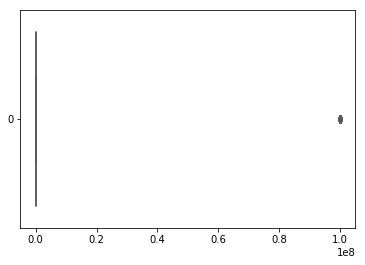

In [30]:
ax = sns.boxplot(data=train['current_loan_amount'], orient="h", palette="Set2")

In [31]:
# check the description their is a placeholder in max value
train[train['current_loan_amount']==99999999.000]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
21,b4130876-c81b-423d-a69b-a7ab6aa76c68,6255b3d6-d167-48eb-8656-78747b31ae1e,Fully Paid,99999999,Short Term,746.000,10.000,Home Mortgage,178293.000,Debt Consolidation,1142.560,19.400,23.000,13,0,38966,347907,0.000,0.000
34,d140c39f-2a26-429e-a68e-874a58df778a,2868249d-856e-4206-a8f7-8adb2dae4db4,Fully Paid,99999999,Short Term,743.000,6.000,Rent,109175.000,Debt Consolidation,1401.080,21.500,nan,12,0,17466,37321,0.000,0.000
37,9b235251-b029-4fb8-b87e-75255f8660d7,81d48734-77cb-4379-9802-fcf77ad82088,Fully Paid,99999999,Short Term,735.000,10.000,Home Mortgage,84456.000,Debt Consolidation,1703.200,24.500,nan,18,0,21182,89373,0.000,0.000
44,45a1ec5e-20cc-40ed-aaf1-a5de6fbd19b1,6d4ad284-7311-4e34-86bb-cfa2a20de736,Fully Paid,99999999,Short Term,735.000,10.000,Home Mortgage,55363.000,Debt Consolidation,516.720,33.400,12.000,19,0,5827,41328,0.000,0.000
50,d1d847ee-43fc-49ac-b9a4-48ab3cc23f9a,97d23b9d-ddbe-4505-adfe-5898ecf1ba88,Fully Paid,99999999,Short Term,746.000,2.000,Home Mortgage,132626.000,Debt Consolidation,1801.500,14.000,nan,14,0,15754,21941,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55362,9c28c63d-75b0-42df-8416-e88cc93ae0a7,3c273143-63ba-400d-810a-c4b80668db72,Fully Paid,99999999,Short Term,737.000,5.000,Home Mortgage,32210.000,Debt Consolidation,456.300,11.100,nan,5,0,4208,4530,0.000,0.000
55374,44bc349f-f21e-46c7-a6c3-1e20bd249e0c,c513cd75-e007-4cf2-b929-07df95b3f825,Fully Paid,99999999,Short Term,734.000,4.000,Home Mortgage,85803.000,Debt Consolidation,986.730,21.900,1.000,6,2,6426,10985,0.000,2.000
55381,13be0ed7-b712-4fb2-9d71-d50e77f3c44f,a88250e8-59b8-47ce-8e6b-e21446d31f5d,Fully Paid,99999999,Short Term,746.000,4.000,Rent,73185.000,Debt Consolidation,806.250,28.700,nan,10,0,18104,36796,0.000,0.000
55384,9821d891-5d7a-4141-95c5-65bc09d67f79,b1f6e895-158b-4e26-a35a-875ac7095c3d,Fully Paid,99999999,Short Term,746.000,2.000,Rent,58218.000,other,1135.250,16.400,19.000,17,0,53919,110489,0.000,0.000


In [32]:
#There are such 5861 samples, which is not low so need to replace it by NA's
train['current_loan_amount'] = [np.nan if int(x)==99999999 else x for x in train['current_loan_amount']]

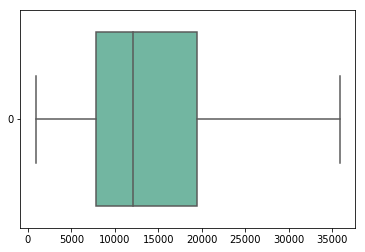

In [33]:
ax = sns.boxplot(data=train['current_loan_amount'], orient="h", palette="Set2")

In [34]:
train.describe()

,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,56375.000,50997.000,59559.000,50997.000,62236.000,62236.000,28202.000,62236.000,62236.000,62236.000,62236.000,62111.000,62232.000
mean,13976.863,720.100,5.880,72470.303,963.653,18.316,35.066,11.105,0.162,15480.470,35785.109,0.114,0.028
std,8296.618,27.891,3.627,60939.354,642.180,7.063,21.934,4.986,0.472,20276.384,372633.539,0.345,0.249
min,885.000,585.000,0.000,4268.000,0.000,3.600,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7800.000,708.000,3.000,44681.000,532.188,13.500,16.000,8.000,0.000,5925.750,12796.000,0.000,0.000
50%,12060.000,728.000,6.000,61708.000,842.560,17.000,32.000,10.000,0.000,11014.000,21813.500,0.000,0.000
75%,19478.000,741.000,10.000,86912.000,1250.362,21.800,51.000,14.000,0.000,19365.250,36476.000,0.000,0.000
max,35875.000,751.000,10.000,8713547.000,22939.120,62.500,176.000,76.000,12.000,1730472.000,69988086.000,7.000,11.000


#### Outlier treatment: Annual Income

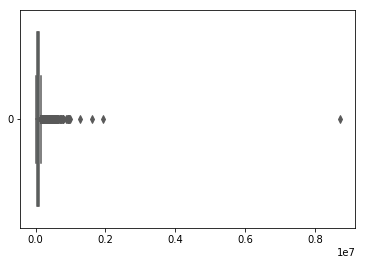

In [35]:
ax = sns.boxplot(data=train['annual_income'], orient="h", palette="Set2")

In [36]:
train[train['annual_income']==8713547.000]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
1574,6dfd2f9c-b796-4cb3-8f71-04d6ae8a8f92,ceee183a-9b02-4b82-ae53-14ccd5f785fd,Charged Off,8006.000,Short Term,725.000,10.000,Home Mortgage,8713547.000,Debt Consolidation,798.740,16.000,nan,11,0,16462,30429,0.000,0.000


In [37]:
train = train[train['annual_income']!=8713547.000]
train.shape

(62235, 19)

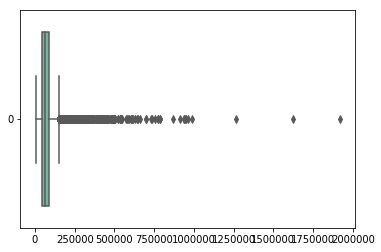

In [38]:
ax = sns.boxplot(data=train['annual_income'], orient="h", palette="Set2")

In [39]:
train[train['annual_income']>1200000]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
3686,d728b670-7248-4c64-b99e-251d9e7b88a2,a0222c05-0157-4791-b2b9-c74d51774d16,Charged Off,34430.000,Long Term,739.000,0.000,Home Mortgage,1623105.000,Debt Consolidation,2637.550,14.700,17.000,15,0,26265,69668,0.000,0.000
11660,cbd2df62-ea45-4ae0-bbeb-1681d5655221,97b34fe1-09e4-4c27-b8cc-ec335ec29891,Charged Off,15928.000,Long Term,733.000,2.000,Home Mortgage,1262125.000,Debt Consolidation,22939.120,19.200,nan,10,0,48726,58565,0.000,0.000
46615,076e5ce5-cc5a-4c3e-8e11-91c31a4fa00e,ecc52a5d-a428-455c-9ae6-332cafac55b2,Fully Paid,28291.000,Short Term,747.000,6.000,Own Home,1919760.000,Debt Consolidation,335.960,11.200,nan,7,0,13889,25768,0.000,0.000


In [40]:
train = train.drop([3686, 11660, 46615])

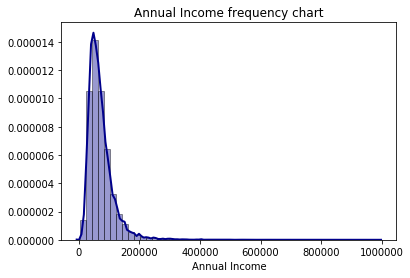

In [41]:
ax = sns.distplot(train['annual_income'].dropna(), hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Annual Income') 
plt.title('Annual Income frequency chart'); 
plt.show()

In [42]:
train.describe()

,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,56371.000,50993.000,59555.000,50993.000,62232.000,62232.000,28201.000,62232.000,62232.000,62232.000,62232.000,62107.000,62228.000
mean,13976.318,720.099,5.880,72210.882,963.286,18.316,35.067,11.105,0.162,15479.772,35784.446,0.114,0.028
std,8296.204,27.891,3.627,45909.542,636.089,7.064,21.934,4.986,0.472,20276.550,372645.476,0.345,0.249
min,885.000,585.000,0.000,4268.000,0.000,3.600,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7800.000,708.000,3.000,44681.000,532.188,13.500,16.000,8.000,0.000,5925.000,12795.750,0.000,0.000
50%,12060.000,728.000,6.000,61696.000,842.560,17.000,32.000,10.000,0.000,11013.500,21812.000,0.000,0.000
75%,19478.000,741.000,10.000,86887.000,1250.322,21.800,51.000,14.000,0.000,19364.250,36475.250,0.000,0.000
max,35875.000,751.000,10.000,986523.000,12055.680,62.500,176.000,76.000,12.000,1730472.000,69988086.000,7.000,11.000


#### Outlier Treatment: Years of Credit History

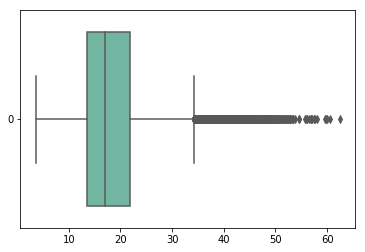

In [43]:
ax = sns.boxplot(data=train['years_of_credit_history'], orient="h", palette="Set2")

In [44]:
train[train['years_of_credit_history']>58]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
1908,cd5ca817-ff39-41e1-8dcd-3a86346c4631,33dd7f5c-92fa-4dcf-b798-6565b8281f0d,Fully Paid,14829.000,Short Term,741.000,7.000,Home Mortgage,86008.000,Business Loan,860.800,59.900,nan,9,1,4558,9596,1.000,0.000
32096,433a4adf-886b-4df7-998a-a0e171fb98bc,7e068df8-61ed-4418-9e6f-9d7610f3238f,Fully Paid,14802.000,Short Term,nan,nan,Home Mortgage,nan,Debt Consolidation,821.020,62.500,24.000,8,0,7007,23593,0.000,0.000
45779,0ca8800a-36f0-48b3-9564-2cce86190862,b6d390e3-8cb6-44b7-981a-ce00be0ca85f,Charged Off,21197.000,Short Term,nan,10.000,Home Mortgage,nan,Debt Consolidation,1574.660,60.500,48.000,11,1,7928,19575,1.000,0.000
49017,133375dc-a8ef-481a-854e-2958fc7ca9f6,a23f7854-accc-48c6-8634-d9277f92c10b,Charged Off,20190.000,Short Term,710.000,10.000,Home Mortgage,46290.000,Home Improvements,690.490,59.700,nan,7,0,2865,7091,0.000,0.000
61832,7e687480-14cb-416e-bc82-faea0ccf2a71,0c401d4d-523a-4eb5-97b0-f5677fd34ade,Fully Paid,34192.000,Long Term,676.000,10.000,Home Mortgage,126509.000,Debt Consolidation,3478.990,59.500,nan,15,0,59003,71259,0.000,0.000


In [45]:
train = train.drop([1908, 32096, 45779, 49017, 61832])

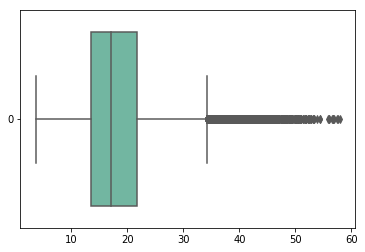

In [46]:
ax = sns.boxplot(data=train['years_of_credit_history'], orient="h", palette="Set2")

In [47]:
train.describe()

,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,56366.000,50990.000,59551.000,50990.000,62227.000,62227.000,28199.000,62227.000,62227.000,62227.000,62227.000,62102.000,62223.000
mean,13975.691,720.099,5.880,72210.054,963.244,18.313,35.066,11.105,0.162,15479.708,35785.214,0.114,0.028
std,8296.036,27.891,3.627,45910.079,636.029,7.054,21.934,4.986,0.472,20276.452,372660.379,0.345,0.249
min,885.000,585.000,0.000,4268.000,0.000,3.600,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7800.000,708.000,3.000,44681.000,532.175,13.500,16.000,8.000,0.000,5925.500,12796.000,0.000,0.000
50%,12059.000,728.000,6.000,61696.000,842.550,17.000,32.000,10.000,0.000,11014.000,21812.000,0.000,0.000
75%,19477.000,741.000,10.000,86887.000,1250.280,21.800,51.000,14.000,0.000,19364.500,36475.500,0.000,0.000
max,35875.000,751.000,10.000,986523.000,12055.680,58.000,176.000,76.000,12.000,1730472.000,69988086.000,7.000,11.000


#### Outlier treatment: Number of Open Accounts

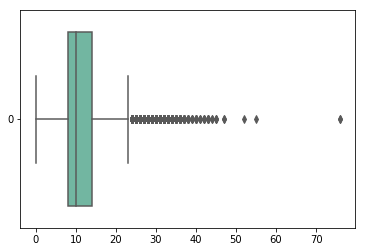

In [48]:
ax = sns.boxplot(data=train['number_of_open_accounts'], orient="h", palette="Set2")

In [49]:
train[train['number_of_open_accounts']>50]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
26502,7d000d90-1538-4d4d-b7c2-15724be2025e,080f449b-c0b7-4226-8a51-cdcc7e68954f,Fully Paid,6082.000,Short Term,742.000,10.000,Home Mortgage,71973.000,Debt Consolidation,422.840,18.700,nan,52,0,7234,164404,0.000,0.000
26637,4f8a7824-b9bd-4b8c-b2a1-6b7b196d2c0f,67a534d6-7038-4e0b-8d42-8aab6d220701,Fully Paid,28185.000,Long Term,744.000,2.000,Home Mortgage,201320.000,Debt Consolidation,4429.040,15.600,nan,55,0,34159,185646,0.000,0.000
27936,08dab131-9db3-4184-a32a-e12e48fd5d6c,907c2a89-76f8-4089-9a47-d410bb885339,Charged Off,18755.000,Long Term,670.000,7.000,Rent,46912.000,Debt Consolidation,1032.060,27.400,nan,76,0,22111,28131,0.000,0.000
39254,f4e0a453-a5ec-4011-9513-9d203ffe8e3c,3e62a9e2-a61b-472d-8e56-234e30061580,Charged Off,20426.000,Short Term,708.000,5.000,Home Mortgage,122556.000,Debt Consolidation,2195.800,15.700,nan,76,0,40606,121575,0.000,0.000


In [50]:
train = train.drop([26502, 26637, 27936, 39254])

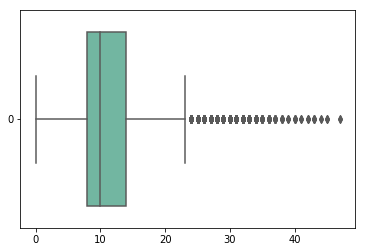

In [51]:
ax = sns.boxplot(data=train['number_of_open_accounts'], orient="h", palette="Set2")

In [52]:
#Capping the outliers
IQR = train['number_of_open_accounts'].quantile(0.75) - train['number_of_open_accounts'].quantile(0.25)
upper_limit = train['number_of_open_accounts'].quantile(0.75) + (IQR * 1.5)
print("Upper Limit:", upper_limit)

Upper Limit: 23.0


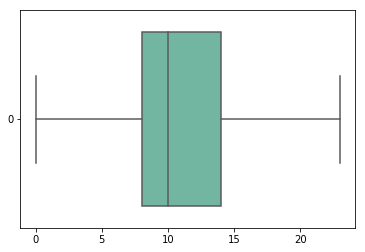

In [53]:
train['number_of_open_accounts'] = [23.0 if ( x>23.0 and x!=np.nan) else x for x in train['number_of_open_accounts']]
ax = sns.boxplot(data=train['number_of_open_accounts'], orient="h", palette="Set2")

In [54]:
print(train.shape)
train.describe()

(62223, 19)


,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,56362.000,50986.000,59547.000,50986.000,62223.000,62223.000,28199.000,62223.000,62223.000,62223.000,62223.000,62098.000,62219.000
mean,13975.380,720.100,5.880,72207.036,963.176,18.313,35.066,11.006,0.162,15479.030,35779.483,0.114,0.028
std,8295.979,27.891,3.627,45907.641,635.875,7.054,21.934,4.649,0.472,20276.671,372671.356,0.345,0.249
min,885.000,585.000,0.000,4268.000,0.000,3.600,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7800.000,708.000,3.000,44681.000,532.175,13.500,16.000,8.000,0.000,5925.000,12795.500,0.000,0.000
50%,12059.000,728.000,6.000,61696.000,842.520,17.000,32.000,10.000,0.000,11014.000,21812.000,0.000,0.000
75%,19476.750,741.000,10.000,86887.000,1250.250,21.800,51.000,14.000,0.000,19363.500,36472.000,0.000,0.000
max,35875.000,751.000,10.000,986523.000,12055.680,58.000,176.000,23.000,12.000,1730472.000,69988086.000,7.000,11.000


Now, all outliers has been handled so let's check the missing values.

In [55]:
train.isnull().sum()

loan_id                             0
customer_id                         0
loan_status                         0
current_loan_amount              5861
term                                0
credit_score                    11237
years_in_current_job             2676
home_ownership                      0
annual_income                   11237
purpose                             0
monthly_debt                        0
years_of_credit_history             0
months_since_last_delinquent    34024
number_of_open_accounts             0
number_of_credit_problems           0
current_credit_balance              0
maximum_open_credit                 0
bankruptcies                      125
tax_liens                           4
dtype: int64

#### Missing Value Treatment: Bankruptcies & Tax Liens

Reference Link for Iterative Imputing:
https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html#sphx-glr-auto-examples-impute-plot-iterative-imputer-variants-comparison-py

In [56]:
# Since percentage value of Missing values in Bankruptcies and Tax Liens are very low we can delete the rows
train = train.dropna(subset=['bankruptcies', 'tax_liens'])
print(train.shape)
train.isnull().sum()

(62098, 19)


loan_id                             0
customer_id                         0
loan_status                         0
current_loan_amount              5847
term                                0
credit_score                    11216
years_in_current_job             2676
home_ownership                      0
annual_income                   11216
purpose                             0
monthly_debt                        0
years_of_credit_history             0
months_since_last_delinquent    34024
number_of_open_accounts             0
number_of_credit_problems           0
current_credit_balance              0
maximum_open_credit                 0
bankruptcies                        0
tax_liens                           0
dtype: int64

#### Missing Value Treatment: Months Since Last Delinquent

This feature describes the number of months since the credit is not paid, so NA's actually are the genuine customers so replacing it with 0.

In [57]:
train["months_since_last_delinquent"].fillna(0, inplace = True)
print(train.shape)
train.isnull().sum()

(62098, 19)


loan_id                             0
customer_id                         0
loan_status                         0
current_loan_amount              5847
term                                0
credit_score                    11216
years_in_current_job             2676
home_ownership                      0
annual_income                   11216
purpose                             0
monthly_debt                        0
years_of_credit_history             0
months_since_last_delinquent        0
number_of_open_accounts             0
number_of_credit_problems           0
current_credit_balance              0
maximum_open_credit                 0
bankruptcies                        0
tax_liens                           0
dtype: int64

#### Missing Value Treatment: Current Loan Amount, Credit Score, Years In Current Job, Annual Income

Applying **'Iterative Imputer'** using default estimator **'Bayesian Ridge'** which is **Regularized Linear Regression**.

In [58]:
train.reset_index(drop=True, inplace=True)
my_imputer = IterativeImputer()
#For this we need only numerical variables so filtering this
train_numerical = train._get_numeric_data()
train_numerical_columns = train_numerical.columns 
print(train_numerical.shape)
train_numerical.isnull().sum()

(62098, 13)


current_loan_amount              5847
credit_score                    11216
years_in_current_job             2676
annual_income                   11216
monthly_debt                        0
years_of_credit_history             0
months_since_last_delinquent        0
number_of_open_accounts             0
number_of_credit_problems           0
current_credit_balance              0
maximum_open_credit                 0
bankruptcies                        0
tax_liens                           0
dtype: int64

In [59]:
train_imputed = my_imputer.fit_transform(train_numerical)
#Imputer will give the array as an object so need to convert it to Dataframe with columns
train_imputed = pd.DataFrame(train_imputed, columns=train_numerical_columns)
train_imputed.isnull().sum()

current_loan_amount             0
credit_score                    0
years_in_current_job            0
annual_income                   0
monthly_debt                    0
years_of_credit_history         0
months_since_last_delinquent    0
number_of_open_accounts         0
number_of_credit_problems       0
current_credit_balance          0
maximum_open_credit             0
bankruptcies                    0
tax_liens                       0
dtype: int64

In [60]:
train_imputed.describe()

,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,62098.000,62098.000,62098.000,62098.000,62098.000,62098.000,62098.000,62098.000,62098.000,62098.000,62098.000,62098.000,62098.000
mean,13856.079,720.194,5.902,72029.815,963.898,18.308,15.896,11.008,0.162,15483.161,35747.365,0.114,0.028
std,8031.639,25.476,3.556,43189.244,635.785,7.055,22.866,4.647,0.473,20273.467,372989.003,0.345,0.249
min,975.000,585.000,0.000,4268.000,0.000,3.600,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7973.000,711.000,3.000,45869.684,532.758,13.500,0.000,8.000,0.000,5935.250,12798.250,0.000,0.000
50%,12036.000,725.000,6.000,63011.000,843.110,17.000,0.000,10.000,0.000,11021.000,21812.000,0.000,0.000
75%,18418.000,739.000,10.000,86424.663,1251.043,21.800,28.000,14.000,0.000,19373.750,36466.000,0.000,0.000
max,91948.471,764.719,10.381,986523.000,12055.680,58.000,176.000,23.000,12.000,1730472.000,69988086.000,7.000,11.000


Plotting histogram to see the difference between without na values and after replacing na values with Iterative Imputer. <br>
train_numerical is our Dataframe with NA's, while, train_imputed is our Dataframe without NA's.

#### Histogram: Current Loan Amount

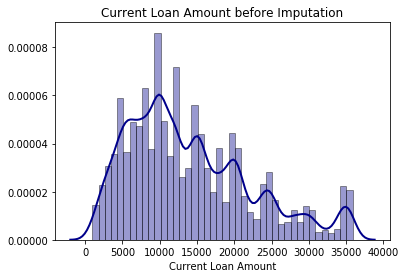

In [61]:
ax = sns.distplot(train_numerical['current_loan_amount'].dropna(), hist=True, kde=True, 
             bins=int(42740/1000), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Current Loan Amount') 
plt.title('Current Loan Amount before Imputation'); 
plt.show()

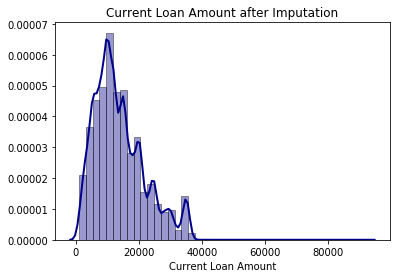

In [62]:
ax = sns.distplot(train_imputed['current_loan_amount'], hist=True, kde=True, 
             bins=int(42740/1000), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Current Loan Amount') 
plt.title('Current Loan Amount after Imputation'); 
plt.show()

In [63]:
temp = train_imputed[train_imputed['current_loan_amount']<40000]

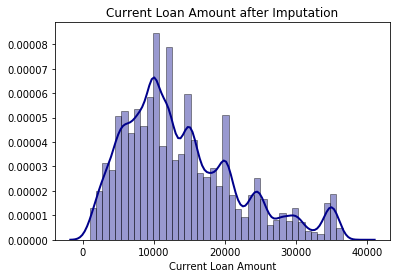

In [64]:
ax = sns.distplot(temp['current_loan_amount'], hist=True, kde=True, 
             bins=int(42740/1000), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Current Loan Amount') 
plt.title('Current Loan Amount after Imputation'); 
plt.show()

#### Histogram: Credit Score

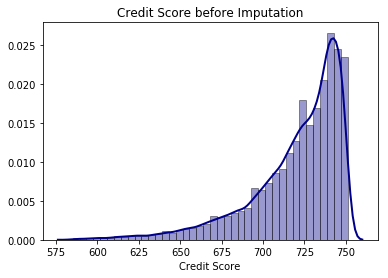

In [65]:
ax = sns.distplot(train_numerical['credit_score'].dropna(), hist=True, kde=True, 
             bins=int(800/20), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Credit Score') 
plt.title('Credit Score before Imputation'); 
plt.show()

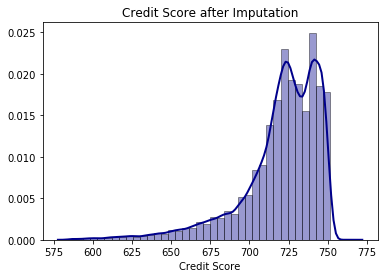

In [66]:
ax = sns.distplot(train_imputed['credit_score'], hist=True, kde=True, 
             bins=int(800/20), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Credit Score') 
plt.title('Credit Score after Imputation'); 
plt.show() 

#### Histogram: Annual Income

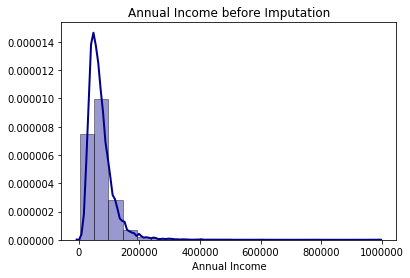

In [67]:
ax = sns.distplot(train_numerical['annual_income'].dropna(), hist=True, kde=True, 
             bins=int(215580/10000), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Annual Income') 
plt.title('Annual Income before Imputation'); 
plt.show()

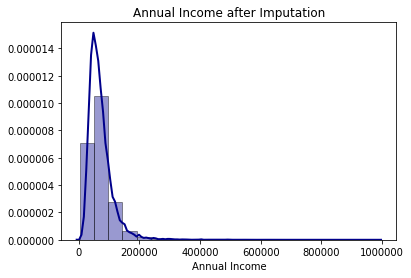

In [68]:
ax = sns.distplot(train_imputed['annual_income'], hist=True, kde=True, 
             bins=int(215580/10000), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Annual Income') 
plt.title('Annual Income after Imputation'); 
plt.show()

#### Histogram: Years In Current Job

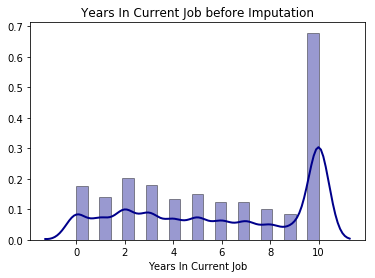

In [69]:
ax = sns.distplot(train_numerical['years_in_current_job'].dropna(), hist=True, kde=True, 
             bins=int(215580/10000), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Years In Current Job') 
plt.title('Years In Current Job before Imputation'); 
plt.show()

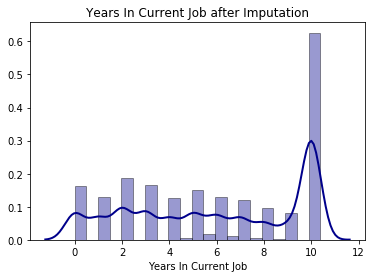

In [70]:
ax = sns.distplot(train_imputed['years_in_current_job'], hist=True, kde=True, 
             bins=int(215580/10000), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Years In Current Job') 
plt.title('Years In Current Job after Imputation'); 
plt.show()

Replacing the feature in Train dataframe by above Imputed dataframe.

In [71]:
train_imputed.shape

(62098, 13)

In [72]:
train.shape

(62098, 19)

In [73]:
train['years_in_current_job'] = train_imputed['years_in_current_job']
train['current_loan_amount'] = train_imputed['current_loan_amount']
train['credit_score'] = train_imputed['credit_score']
train['annual_income'] = train_imputed['annual_income']

In [74]:
print(train.shape)
train.isnull().sum()

(62098, 19)


loan_id                         0
customer_id                     0
loan_status                     0
current_loan_amount             0
term                            0
credit_score                    0
years_in_current_job            0
home_ownership                  0
annual_income                   0
purpose                         0
monthly_debt                    0
years_of_credit_history         0
months_since_last_delinquent    0
number_of_open_accounts         0
number_of_credit_problems       0
current_credit_balance          0
maximum_open_credit             0
bankruptcies                    0
tax_liens                       0
dtype: int64

#### Converting Months since last delinquent into categories

In [75]:
train['months_since_last_delinquent'] = ['extreme_risk' if x>51 
        else 'high_risk' if x>32 
        else 'moderate_risk' if x>16 
        else 'low_risk' if x>0 else 'no_risk' for x in train['months_since_last_delinquent']]

In [76]:
train['months_since_last_delinquent'].unique()

array(['moderate_risk', 'no_risk', 'low_risk', 'extreme_risk',
       'high_risk'], dtype=object)

In [77]:
# For each column heading we replace " " and convert the heading in lowercase 
cleancolumn = []
for i in range(len(test.columns)):
    cleancolumn.append(test.columns[i].replace(' ', '_').lower())
test.columns = cleancolumn

In [78]:
test.head()

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,0c49cbd6-dd97-4b99-9c05-c63a5d592fde,923ee454-6911-4f5a-9dfd-ba6b00b92718,Fully Paid,99999999,Short Term,728.000,1 year,Home Mortgage,76133.000,Debt Consolidation,1161.02,15.200,nan,16,1,9880,14424,1.000,0.000
1,8be00956-6b7f-4b74-8398-87c8035605df,da041fa4-e423-4eb3-9d81-9ee1fd52f750,Fully Paid,34202,Short Term,724.000,10+ years,Home Mortgage,107492.000,Debt Consolidation,2902.28,17.200,71.000,17,0,26461,42135,0.000,0.000
2,57359000-1074-44fa-833b-4bea7a0a9d26,f9041857-4e0a-449c-af67-b2fbbd11950b,Fully Paid,17991,Short Term,743.000,10+ years,Own Home,69965.000,Debt Consolidation,1055.3,36.000,12.000,26,0,11713,61005,0.000,0.000
3,90a7d1b4-3997-414b-9abb-1de8cec79b18,304143c6-d619-48f3-9807-61371b47a230,Charged Off,31722,Long Term,686.000,2 years,Rent,72365.000,major_purchase,844.26,11.200,41.000,5,0,16151,19227,0.000,0.000
4,c2f24b30-bec3-4944-a417-c8d7b377810e,de2c8c55-468c-4b4b-b73f-7907eeb8e096,Fully Paid,13650,Long Term,719.000,7 years,Home Mortgage,78956.000,Debt Consolidation,520.45,20.400,35.000,9,0,17029,23784,0.000,0.000


In [79]:
print(test.shape)
test.describe()

(26673, 19)


,current_loan_amount,credit_score,annual_income,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,bankruptcies,tax_liens
count,26673.000,21824.000,21824.000,26673.000,12201.000,26673.000,26673.000,26673.000,26606.000,26669.000
mean,9216776.637,1177.262,72251.794,18.314,35.114,11.122,0.158,15332.594,0.111,0.028
std,28904826.191,1646.618,49361.548,7.016,22.182,4.961,0.477,18136.025,0.338,0.277
min,491.000,585.000,4033.000,4.000,0.000,1.000,0.000,0.000,0.000,0.000
25%,8086.000,711.000,44519.000,13.500,16.000,8.000,0.000,5991.000,0.000,0.000
50%,13307.000,731.000,61441.000,17.000,32.000,10.000,0.000,11090.000,0.000,0.000
75%,21584.000,743.000,86469.500,21.800,51.000,14.000,0.000,19157.000,0.000,0.000
max,99999999.000,7510.000,1478700.000,70.500,143.000,56.000,15.000,683524.000,5.000,15.000


In [80]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26673 entries, 0 to 26672
Data columns (total 19 columns):
loan_id                         26673 non-null object
customer_id                     26673 non-null object
loan_status                     26673 non-null object
current_loan_amount             26673 non-null int64
term                            26673 non-null object
credit_score                    21824 non-null float64
years_in_current_job            25533 non-null object
home_ownership                  26673 non-null object
annual_income                   21824 non-null float64
purpose                         26673 non-null object
monthly_debt                    26673 non-null object
years_of_credit_history         26673 non-null float64
months_since_last_delinquent    12201 non-null float64
number_of_open_accounts         26673 non-null int64
number_of_credit_problems       26673 non-null int64
current_credit_balance          26673 non-null int64
maximum_open_credit        

In [81]:
# Check the unique values, to see if there is any duplicates
unique_loanid_test=test['loan_id'].unique().tolist()
print("Total samples in data:", str(test.shape[0]))
print("Total unique samples in data:", str(len(unique_loanid_test)))
print("Duplicate samples in data:", str(test.shape[0] - len(unique_loanid_test)))

Total samples in data: 26673
Total unique samples in data: 26673
Duplicate samples in data: 0


In [82]:
# Drop the duplicates
test = test.drop_duplicates()
print("Total samples in data:", str(test.shape[0]))
print("Total unique samples in data:", str(len(unique_loanid_test)))
print("Duplicate samples in data:", str(test.shape[0] - len(unique_loanid_test)))

Total samples in data: 26673
Total unique samples in data: 26673
Duplicate samples in data: 0


In [83]:
test['years_in_current_job'].unique()

array(['1 year', '10+ years', '2 years', '7 years', nan, '< 1 year',
       '8 years', '4 years', '3 years', '9 years', '5 years', '6 years'],
      dtype=object)

In [84]:
test['years_in_current_job'] = [1 if str(x)=='1 year' else x if str(x)=='nan' else int(re.findall(r'\d+', str(x))[0]) for x in test['years_in_current_job']]
test['years_in_current_job'].unique()

array([ 1., 10.,  2.,  7., nan,  8.,  4.,  3.,  9.,  5.,  6.])

In [85]:
test['credit_score'].head(10)

0    728.000
1    724.000
2    743.000
3    686.000
4    719.000
5    717.000
6   7340.000
7    731.000
8    734.000
9        nan
Name: credit_score, dtype: float64

In [86]:
test['credit_score'] = test['credit_score'].map(credit_range)
test['credit_score'].head(10)

0   728.000
1   724.000
2   743.000
3   686.000
4   719.000
5   717.000
6   734.000
7   731.000
8   734.000
9       nan
Name: credit_score, dtype: float64

In [87]:
print(test.shape)
test[test['maximum_open_credit']=='#VALUE!']

(26673, 19)


,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
11382,e42ae1f7-74b5-46d7-95ce-46a88918ba12,a679ed55-963a-4de6-8be0-4364eb601b6f,Charged Off,2052,Short Term,703.000,10.000,Rent,95105.000,Debt Consolidation,1910.02,22.400,37.000,9,0,0,#VALUE!,0.000,0.000


In [88]:
test = test[test['maximum_open_credit'] != '#VALUE!']
test['maximum_open_credit']= pd.to_numeric(test['maximum_open_credit'])
test.shape

(26672, 19)

In [89]:
test['monthly_debt']=test['monthly_debt'].str.strip('$')
test['monthly_debt']=pd.to_numeric(test['monthly_debt'])
test['monthly_debt'].describe()

count   26672.000
mean      961.798
std       626.527
min         0.000
25%       532.305
50%       846.995
75%      1250.632
max      9060.850
Name: monthly_debt, dtype: float64

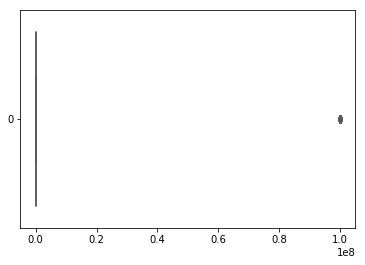

In [90]:
ax = sns.boxplot(data=test['current_loan_amount'], orient="h", palette="Set2")

In [91]:
test[test['current_loan_amount']==99999999.000]


,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,0c49cbd6-dd97-4b99-9c05-c63a5d592fde,923ee454-6911-4f5a-9dfd-ba6b00b92718,Fully Paid,99999999,Short Term,728.000,1.000,Home Mortgage,76133.000,Debt Consolidation,1161.020,15.200,nan,16,1,9880,14424,1.000,0.000
40,b2130dbe-06ca-4adc-a7a9-4ad9de80e486,b377cc5f-b418-40ed-9d6c-e2a4cd2a8d3c,Fully Paid,99999999,Short Term,751.000,9.000,Rent,72120.000,Other,1646.740,17.200,nan,20,0,206,4469,0.000,0.000
54,d1522b51-9aa7-48e2-b116-9cf696b1541a,af3110b4-579e-45d2-9674-4ce2a4792a05,Fully Paid,99999999,Short Term,749.000,1.000,Rent,49285.000,Debt Consolidation,656.310,15.900,nan,6,0,7694,10177,0.000,0.000
65,9210e0be-835d-439c-b21a-b2e753e76bbb,f0bb0e2f-dd0d-430f-8557-d58ccb7dceb2,Fully Paid,99999999,Short Term,738.000,7.000,Home Mortgage,35060.000,Home Improvements,279.600,13.600,22.000,7,0,1109,20535,0.000,0.000
67,07c05b12-3779-4684-8570-0af110f63a72,1b6c04b9-e74c-418d-b888-eadb3a5fc39d,Fully Paid,99999999,Long Term,727.000,7.000,Home Mortgage,39276.000,Debt Consolidation,798.610,10.700,nan,9,0,11742,15997,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26620,446b7993-767c-4196-a49c-68b9dac2e520,6d141fd5-de35-45dd-92a8-b4fd2b898a22,Fully Paid,99999999,Short Term,730.000,10.000,Home Mortgage,142187.000,Debt Consolidation,2109.100,14.500,39.000,17,0,9774,10299,0.000,0.000
26648,02199021-da32-4ff1-97f9-9b12d7b8df12,1a269000-8ee2-4b50-8c13-bc4e72f8c480,Fully Paid,99999999,Short Term,747.000,9.000,Home Mortgage,71722.000,Debt Consolidation,1637.650,17.600,nan,13,0,21437,46500,0.000,0.000
26650,a2099b18-5cd5-4d35-8cea-65d4a3f29a05,2b3f990d-a46d-40d7-abb0-791b158c6ddc,Fully Paid,99999999,Short Term,747.000,8.000,Home Mortgage,46349.000,Debt Consolidation,513.700,46.900,56.000,13,0,10945,42586,0.000,0.000
26670,90aff423-10d6-479d-9ffc-8d3a74603938,5ea1d9d9-3d1e-4a45-b935-8f1cf34dd92d,Fully Paid,99999999,Short Term,750.000,5.000,Own Home,33492.000,Buy a Car,381.810,14.400,nan,7,0,995,18422,0.000,0.000


In [92]:
test['current_loan_amount'] = [np.nan if int(x)==99999999 else x for x in test['current_loan_amount']]

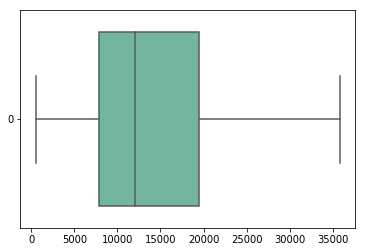

In [93]:
ax = sns.boxplot(data=test['current_loan_amount'], orient="h", palette="Set2")

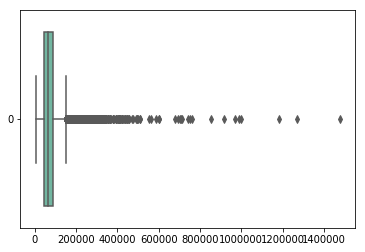

In [94]:
ax = sns.boxplot(data=test['annual_income'], orient="h", palette="Set2")

In [95]:
test.describe()

,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,24217.000,21823.000,25532.000,21823.000,26672.000,26672.000,12200.000,26672.000,26672.000,26672.000,26672.000,26605.000,26668.000
mean,14001.884,719.927,5.934,72250.747,961.798,18.313,35.114,11.122,0.158,15333.168,36385.788,0.111,0.028
std,8280.843,27.633,3.503,49362.437,626.527,7.016,22.183,4.961,0.477,18136.122,469628.754,0.338,0.277
min,491.000,585.000,1.000,4033.000,0.000,4.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,7836.000,708.000,2.000,44519.000,532.305,13.500,16.000,8.000,0.000,5991.000,12718.000,0.000,0.000
50%,12055.000,728.000,6.000,61440.000,846.995,17.000,32.000,10.000,0.000,11092.000,21707.500,0.000,0.000
75%,19512.000,740.000,10.000,86465.500,1250.632,21.800,51.000,14.000,0.000,19157.500,36117.250,0.000,0.000
max,35868.000,751.000,10.000,1478700.000,9060.850,70.500,143.000,56.000,15.000,683524.000,59305735.000,5.000,15.000


In [96]:
test[test['annual_income']==8713547.000]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens


In [97]:
test = test[test['annual_income']!=8713547.000]
train.shape

(62098, 19)

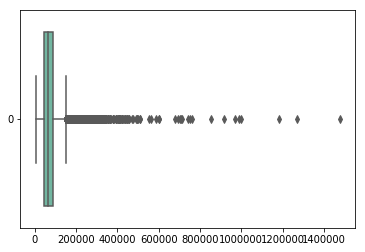

In [98]:
ax = sns.boxplot(data=test['annual_income'], orient="h", palette="Set2")


In [99]:
test[test['annual_income']>1200000]


,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
9470,4618d7d2-6eb0-4c05-9956-a421992bdaae,bbf74537-4cd3-4ffb-b75a-7b3d3c0009e2,Fully Paid,34503.000,Short Term,729.000,10.000,Home Mortgage,1478700.000,other,5298.680,18.400,20.000,15,4,83918,88242,0.000,4.000
21777,85a6f5ea-41ec-4c8b-9539-bbb75d335ae1,5596983d-4f23-4020-859a-376bf2205b28,Charged Off,34237.000,Short Term,745.000,5.000,Own Home,1271660.000,Debt Consolidation,815.990,28.100,nan,22,0,9665,55226,0.000,0.000


In [100]:
test = test.drop([9470,21777])

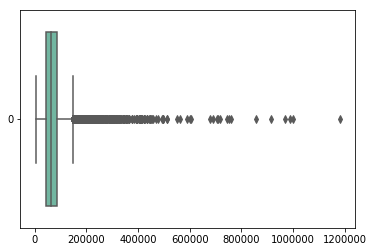

In [101]:
ax = sns.boxplot(data=test['annual_income'], orient="h", palette="Set2")

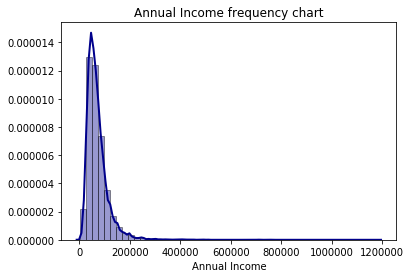

In [102]:
ax = sns.distplot(test['annual_income'].dropna(), hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Annual Income') 
plt.title('Annual Income frequency chart'); 
plt.show()

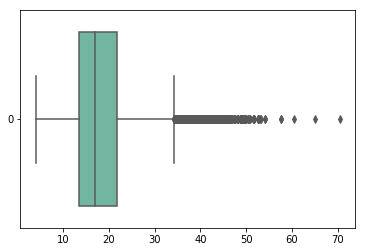

In [103]:
ax = sns.boxplot(data=test['years_of_credit_history'], orient="h", palette="Set2")

In [104]:
test[test['years_of_credit_history']>58]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
4829,ad206b2c-c2d5-4bd8-a139-de6c87cfef3f,c95a500c-eea4-4d78-a09e-1e5218a33358,Charged Off,10951.000,Short Term,748.000,nan,Own Home,51918.000,Debt Consolidation,908.570,60.500,8.000,6,0,24249,35661,0.000,0.000
5060,e4c99559-cd12-4b4d-abc9-fb1d04762537,57251652-1195-46e9-a71d-e68dacd51701,Fully Paid,11965.000,Short Term,721.000,9.000,Home Mortgage,47362.000,Debt Consolidation,365.090,65.000,33.000,12,0,12578,24712,0.000,0.000
24164,7db95e04-1081-43e1-8dab-77d0202145f8,6bb86735-f834-42b3-bd98-360da7094185,Fully Paid,6109.000,Short Term,743.000,6.000,Home Mortgage,33964.000,Home Improvements,0.000,70.500,78.000,5,2,0,0,0.000,0.000


In [105]:
test = test.drop([4829,5060, 24164])

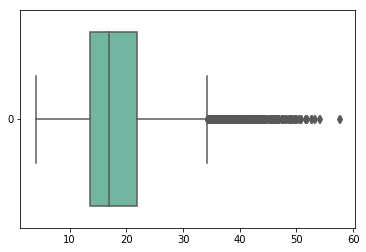

In [106]:
ax = sns.boxplot(data=test['years_of_credit_history'], orient="h", palette="Set2")

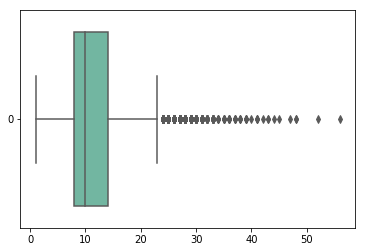

In [107]:
ax = sns.boxplot(data=test['number_of_open_accounts'], orient="h", palette="Set2")

In [108]:
test[test['number_of_open_accounts']>50]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
4935,1653fa6e-eaef-41ce-831c-db5172fc966b,9646ae9b-104e-4b8d-913a-cecfbcd11de4,Fully Paid,18214.000,Short Term,721.000,8.000,Rent,67440.000,Debt Consolidation,1893.920,16.800,nan,56,0,33929,55169,0.000,0.000
18759,8c32029e-0af5-4d1f-852f-2f0325bf6f42,50636032-0df6-4e6d-af9d-474f317c77e0,Charged Off,5837.000,Short Term,711.000,3.000,Own Home,36297.000,Debt Consolidation,356.920,8.900,nan,52,0,1678,12342,0.000,0.000


In [109]:
test = test.drop([4935,18759])

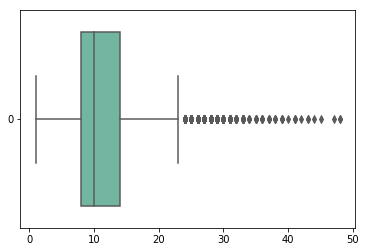

In [110]:
ax = sns.boxplot(data=test['number_of_open_accounts'], orient="h", palette="Set2")

In [111]:
#Capping the outliers
IQR = test['number_of_open_accounts'].quantile(0.75) - test['number_of_open_accounts'].quantile(0.25)
upper_limit = test['number_of_open_accounts'].quantile(0.75) + (IQR * 1.5)
print("Upper Limit:", upper_limit)

Upper Limit: 23.0


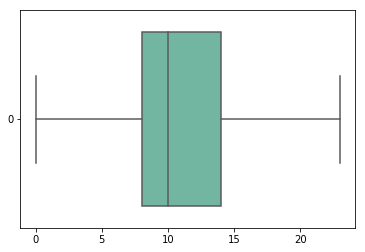

In [112]:
test['number_of_open_accounts'] = [23.0 if ( x>23.0 and x!=np.nan) else x for x in test['number_of_open_accounts']]
ax = sns.boxplot(data=train['number_of_open_accounts'], orient="h", palette="Set2")

In [113]:
test.isnull().sum()

loan_id                             0
customer_id                         0
loan_status                         0
current_loan_amount              2455
term                                0
credit_score                     4849
years_in_current_job             1139
home_ownership                      0
annual_income                    4849
purpose                             0
monthly_debt                        0
years_of_credit_history             0
months_since_last_delinquent    14469
number_of_open_accounts             0
number_of_credit_problems           0
current_credit_balance              0
maximum_open_credit                 0
bankruptcies                       67
tax_liens                           4
dtype: int64

In [114]:
test = test.dropna(subset=['bankruptcies', 'tax_liens'])
print(test.shape)
test.isnull().sum()

(26598, 19)


loan_id                             0
customer_id                         0
loan_status                         0
current_loan_amount              2448
term                                0
credit_score                     4833
years_in_current_job             1139
home_ownership                      0
annual_income                    4833
purpose                             0
monthly_debt                        0
years_of_credit_history             0
months_since_last_delinquent    14468
number_of_open_accounts             0
number_of_credit_problems           0
current_credit_balance              0
maximum_open_credit                 0
bankruptcies                        0
tax_liens                           0
dtype: int64

In [115]:
test["months_since_last_delinquent"].fillna(0, inplace = True)
print(test.shape)
test.isnull().sum()

(26598, 19)


loan_id                            0
customer_id                        0
loan_status                        0
current_loan_amount             2448
term                               0
credit_score                    4833
years_in_current_job            1139
home_ownership                     0
annual_income                   4833
purpose                            0
monthly_debt                       0
years_of_credit_history            0
months_since_last_delinquent       0
number_of_open_accounts            0
number_of_credit_problems          0
current_credit_balance             0
maximum_open_credit                0
bankruptcies                       0
tax_liens                          0
dtype: int64

In [116]:
test.reset_index(drop=True, inplace=True)
my_imputer = IterativeImputer()
#For this we need only numerical variables so filtering this
test_numerical = test._get_numeric_data()
test_numerical_columns = test_numerical.columns 
print(test_numerical.shape)
test_numerical.isnull().sum()


(26598, 13)


current_loan_amount             2448
credit_score                    4833
years_in_current_job            1139
annual_income                   4833
monthly_debt                       0
years_of_credit_history            0
months_since_last_delinquent       0
number_of_open_accounts            0
number_of_credit_problems          0
current_credit_balance             0
maximum_open_credit                0
bankruptcies                       0
tax_liens                          0
dtype: int64

In [117]:
test_imputed = my_imputer.fit_transform(test_numerical)
#Imputer will give the array as an object so need to convert it to Dataframe with columns
test_imputed = pd.DataFrame(test_imputed, columns=test_numerical_columns)
test_imputed.isnull().sum()

current_loan_amount             0
credit_score                    0
years_in_current_job            0
annual_income                   0
monthly_debt                    0
years_of_credit_history         0
months_since_last_delinquent    0
number_of_open_accounts         0
number_of_credit_problems       0
current_credit_balance          0
maximum_open_credit             0
bankruptcies                    0
tax_liens                       0
dtype: int64

In [118]:
test['years_in_current_job'] = test_imputed['years_in_current_job']
test['current_loan_amount'] = test_imputed['current_loan_amount']
test['credit_score'] = test_imputed['credit_score']
test['annual_income'] = test_imputed['annual_income']

In [119]:
test['months_since_last_delinquent'].unique()

array([  0.,  71.,  12.,  41.,  35.,   8.,  15.,   6.,   9.,  56.,  30.,
        51.,  16.,  21.,  49.,  38.,  23.,  37.,  72.,  75.,  22.,   3.,
        39.,  70.,   5.,  27.,  32.,  18.,  26.,  10.,  64.,  13.,  80.,
        73.,   7.,  11.,  45.,  42.,  48.,  81.,  17.,  40.,  31.,  66.,
        67.,  29.,  36.,  25.,  14.,  59.,  65.,  34.,  57.,  44.,  46.,
        33.,  60.,  53.,   2.,  24.,  19.,  78.,   4.,  79.,  77.,  28.,
        68.,  61.,  63.,  54.,  55.,  43.,  52.,  20.,  47.,  58.,  76.,
        62.,  82.,  74.,  83.,  69.,  50.,   1.,  87., 131.,  85., 104.,
       107.,  97., 114., 141., 120., 143.,  84.,  92.])

In [120]:
test['months_since_last_delinquent'] = ['extreme_risk' if x>51 
        else 'high_risk' if x>32 
        else 'moderate_risk' if x>16 
        else 'low_risk' if x>0 else 'no_risk' for x in test['months_since_last_delinquent']]

In [121]:
test.isnull().sum()

loan_id                         0
customer_id                     0
loan_status                     0
current_loan_amount             0
term                            0
credit_score                    0
years_in_current_job            0
home_ownership                  0
annual_income                   0
purpose                         0
monthly_debt                    0
years_of_credit_history         0
months_since_last_delinquent    0
number_of_open_accounts         0
number_of_credit_problems       0
current_credit_balance          0
maximum_open_credit             0
bankruptcies                    0
tax_liens                       0
dtype: int64